_______________________
<font size=8 color=maroon> WEEK 24 : GRADED MINI PROJECT

_________________

# <font size=6 color=chocolate>***Bank Customer Churn Analysis***

<font size=5 color=olive>Introduction

In today’s competitive financial landscape, customer retention is a key driver of profitability. A leading international bank is experiencing a surge in customer churn—clients are closing accounts despite a wide array of financial products. This trend threatens long-term growth and brand loyalty.This notebook addresses the project objectives: cleaning and preprocessing the dataset, performing EDA to uncover churn patterns, building predictive models for churn, and deriving insights. The dataset contains customer data with the target variable Exited (1 = churned, 0 = stayed).

<font size=5 color=olive>Libraries used:

- pandas for data manipulation
- numpy for numerical operations
- matplotlib and seaborn for visualization
- scikit-learn for preprocessing, modeling, and evaluation
- scipy for hierarchical clustering (explored in EDA for unsupervised insights)



<font size=5 color=olive> Objective
As a data analyst, your mission is to:
- Analyze customer data to uncover churn-driving factors.
- Build a predictive model to classify customers as likely to stay or exit.
- Enable targeted retention strategies for at-risk customers.

<font size=5 color=olive>Problem Statement
> “Which customers are at risk of leaving the bank?”

Answering this question empowers the bank’s marketing and customer success teams to proactively engage vulnerable customers and reduce churn.

-------------
<font size=6 color=seagreen > Tasks To Do

--------------


<font size=4 color=cyan>1. **Data Cleaning & Preprocessing**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Dataset
df = pd.read_csv('/content/Data.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15708791.0,Abazu,584,Spain,Male,32.0,9,85534.83,1,0.0,0.0,169137.24,0
1,15576156.0,Abazu,710,Spain,Female,28.0,6,0.00,1,1.0,0.0,48426.98,0
2,15737792.0,Abbie,818,France,Female,31.0,1,186796.37,1,0.0,0.0,178252.63,0
3,15680804.0,Abbott,850,France,Male,29.0,6,0.00,2,1.0,1.0,10672.54,0
4,15723706.0,Abbott,573,France,Female,33.0,0,90124.64,1,1.0,0.0,137476.71,0


In [3]:
print(f'Shape of the dataset\t: {df.shape}')
print(f'Row Labels\t\t:  {df.index}')
print(f'\nColumns:\n {df.columns}')
print(f'\nData types: \n{df.dtypes}')

Shape of the dataset	: (10502, 13)
Row Labels		:  RangeIndex(start=0, stop=10502, step=1)

Columns:
 Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Data types: 
CustomerId         float64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [4]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10502 entries, 0 to 10501
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9571 non-null   float64
 1   Surname          10502 non-null  object 
 2   CreditScore      10502 non-null  int64  
 3   Geography        10490 non-null  object 
 4   Gender           9560 non-null   object 
 5   Age              9516 non-null   float64
 6   Tenure           10502 non-null  int64  
 7   Balance          10502 non-null  float64
 8   NumOfProducts    10502 non-null  int64  
 9   HasCrCard        10501 non-null  float64
 10  IsActiveMember   10501 non-null  float64
 11  EstimatedSalary  10502 non-null  float64
 12  Exited           10502 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.0+ MB
None


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.571000e+03,10502.000000,9516.000000,10502.000000,10502.000000,10502.000000,10501.000000,10501.000000,10502.000000,10502.000000
mean,1.569088e+07,650.773948,38.899015,5.015045,76426.091730,1.530375,0.704980,0.514713,100401.133536,0.204247
std,7.197178e+04,96.725437,10.523426,2.895205,62423.431813,0.581580,0.456073,0.499807,57536.903200,0.403169
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562831e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51431.732500,0.000000
50%,1.569059e+07,652.000000,37.000000,5.000000,97029.715000,1.000000,1.000000,1.000000,100600.355000,0.000000
75%,1.575311e+07,718.000000,44.000000,8.000000,127647.840000,2.000000,1.000000,1.000000,149643.620000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


><font color=goldenrod>Detecting Missing Values

In [6]:
# Returns True/False Values for each Columns
df.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10497,False,False,False,False,False,False,False,False,False,False,False,False,False
10498,False,False,False,False,False,False,False,False,False,False,False,False,False
10499,True,False,False,False,True,True,False,False,False,False,False,False,False
10500,True,False,False,False,True,True,False,False,False,False,False,False,False


In [7]:
# Column-wise sum
df.isna().sum(axis=0)

,0
CustomerId,931
Surname,0
CreditScore,0
Geography,12
Gender,942
Age,986
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1


In [8]:
# Calculating the percentage of missing values
missing = (df.isna().sum() / df.shape[0] *100).round(2).sort_values(ascending=False)
missing

,0
Age,9.39
Gender,8.97
CustomerId,8.86
Geography,0.11
HasCrCard,0.01
IsActiveMember,0.01
CreditScore,0.00
Surname,0.00
Tenure,0.00
NumOfProducts,0.00


><font color=goldenrod>Handling Missing Values

<font size=3 color=yellowgreen>Drop '***CustomerId***' (high missing: 931; ID only, potential duplicates) and 'Surname' (categorical, not useful for prediction).

In [9]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
print("Shape after dropping IDs:", df.shape)
print("Missing values after drop:\n", df.isnull().sum())

Shape after dropping IDs: (10502, 11)
Missing values after drop:
 CreditScore          0
Geography           12
Gender             942
Age                986
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
dtype: int64


<font size=3 color=yellowgreen>Imputation with rest of the missing values in the data

In [10]:
print(f'Missing values before imputation:\n{df.isna().sum()}')

#Geography
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
#Gender
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
#Age
df['Age'].fillna(df['Age'].median(), inplace=True)

#HasCrCard and IsActiveMember
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)

print(f'\nMissing values after imputation:\n{df.isna().sum()}')
print(f'\nData types after: \n{df.dtypes}')

Missing values before imputation:
CreditScore          0
Geography           12
Gender             942
Age                986
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
dtype: int64

Missing values after imputation:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data types after: 
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


><font color=goldenrod>Detect and Remove Duplicate Records

In [11]:
# Check Duplicates
print(f'Number of duplicate records: {df.duplicated().sum()}')

Number of duplicate records: 502


In [12]:
# Remove duplicates (based on all columns except target for fairness)
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())
print("Shape after duplicate removal:", df.shape)

Duplicates after: 0
Shape after duplicate removal: (10000, 11)


><font color=goldenrod>Convert Categorical Variables to Numerical

- <font color=yellowgreen> One-hot encode 'Geography' (France/Spain/Germany) and 'Gender' (Male/Female).
- <font color=yellowgreen> Binary vars (HasCrCard, etc.) already numerical.


In [13]:
# one-hot encode
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
print("\nShape after encoding :", df_encoded.shape)
print("\nNew Columns: ", [col for col in df_encoded.columns if 'Geography_' in col or 'Gender_' in col])
print(f'\nEncoded data type:\n{df_encoded.dtypes}')
print(f'\nDataset:\n')
df_encoded.head()


Shape after encoding : (10000, 12)

New Columns:  ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

Encoded data type:
CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

Dataset:



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,584,32.0,9,85534.83,1,0,0,169137.24,0,False,True,True
1,710,28.0,6,0.00,1,1,0,48426.98,0,False,True,False
2,818,31.0,1,186796.37,1,0,0,178252.63,0,False,False,False
3,850,29.0,6,0.00,2,1,1,10672.54,0,False,False,True
4,573,33.0,0,90124.64,1,1,0,137476.71,0,False,False,False


><font color=goldenrod> Scale Numerical Features (Only)
- <font color=yellowgreen>Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.
- Use StandardScaler (mean=0, std=1) for modeling/clustering.


In [14]:
# Numerical Columns
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(f'\nScaled data type:\n{df_encoded.dtypes}')
print(f'\nScaled Sample: \n')
df_encoded.head()


Scaled data type:
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

Scaled Sample: 



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.688359,-0.669303,1.378686,0.145028,-0.911583,0,0,1.200658,0,False,True,True
1,0.615335,-1.068238,0.341352,-1.225848,-0.911583,1,0,-0.898372,0,False,True,False
2,1.732787,-0.769037,-1.387538,1.767958,-0.911583,0,0,1.359166,0,False,False,False
3,2.063884,-0.968504,0.341352,-1.225848,0.807737,1,1,-1.554884,0,False,False,True
4,-0.802173,-0.569569,-1.733315,0.218590,-0.911583,1,0,0.650113,0,False,False,False


In [15]:
print(f'\nScaled Mean (should be ~0):\n')
df_encoded[num_cols].mean()


Scaled Mean (should be ~0):



,0
CreditScore,-4.870770e-16
Age,5.329071e-16
Tenure,-1.108447e-16
Balance,-6.608047e-17
NumOfProducts,1.847411e-17
EstimatedSalary,-2.486900e-17


In [16]:
print(f'\nScaled Std (should be ~1):\n')
df_encoded[num_cols].std()


Scaled Std (should be ~1):



,0
CreditScore,1.00005
Age,1.00005
Tenure,1.00005
Balance,1.00005
NumOfProducts,1.00005
EstimatedSalary,1.00005


<font size=4 color=cyan>2. **Exploratory Data Analysis (EDA)**



><font color=goldenrod> Explore the distribution of Exited (churn vs non-churn)

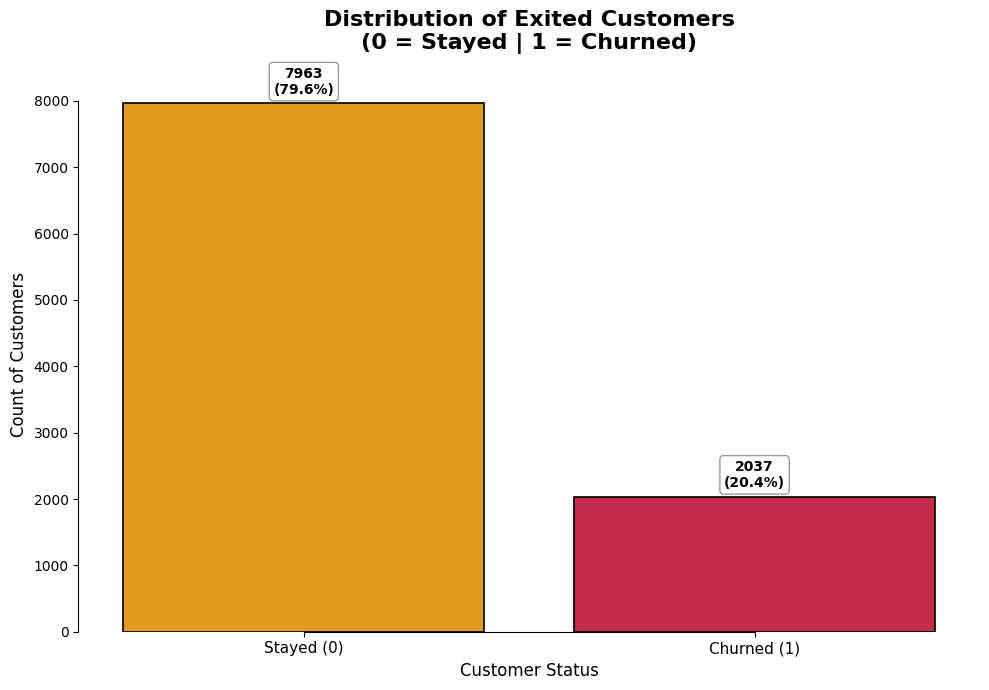

In [17]:
# Use original df for vizualization (pre-scaling/Encoding)
plt.figure(figsize=(10, 7))
total_customers = len(df)
custom_palette = {'0': 'orange', '1': 'crimson'} # Changed keys to strings
ax = sns.countplot(data=df, x='Exited', palette=custom_palette, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Exited Customers\n(0 = Stayed | 1 = Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Status', fontsize=12, fontweight='medium')
plt.ylabel('Count of Customers', fontsize=12, fontweight='medium')
ax.set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)
sns.despine(trim=True)
plt.tight_layout()
# Add value labels on top of bars
for p in ax.patches:
  height = p.get_height()
  percentage = (height / total_customers) * 100
  ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height + (total_customers * 0.01)),
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()

In [18]:
churn_rate = df['Exited'].value_counts(normalize=True)* 100
print('Churn Rate:\n Stayed: {:.1f}%,\n Churned: {:.1f}%'.format(churn_rate[0],churn_rate[1]))

Churn Rate:
 Stayed: 79.6%,
 Churned: 20.4%


><font color=goldenrod> Find key patterns:
- <font color=yellowgreen> Does age affect churn?
- Are certain geographies more likely to churn?
- Does credit score or balance play a role?

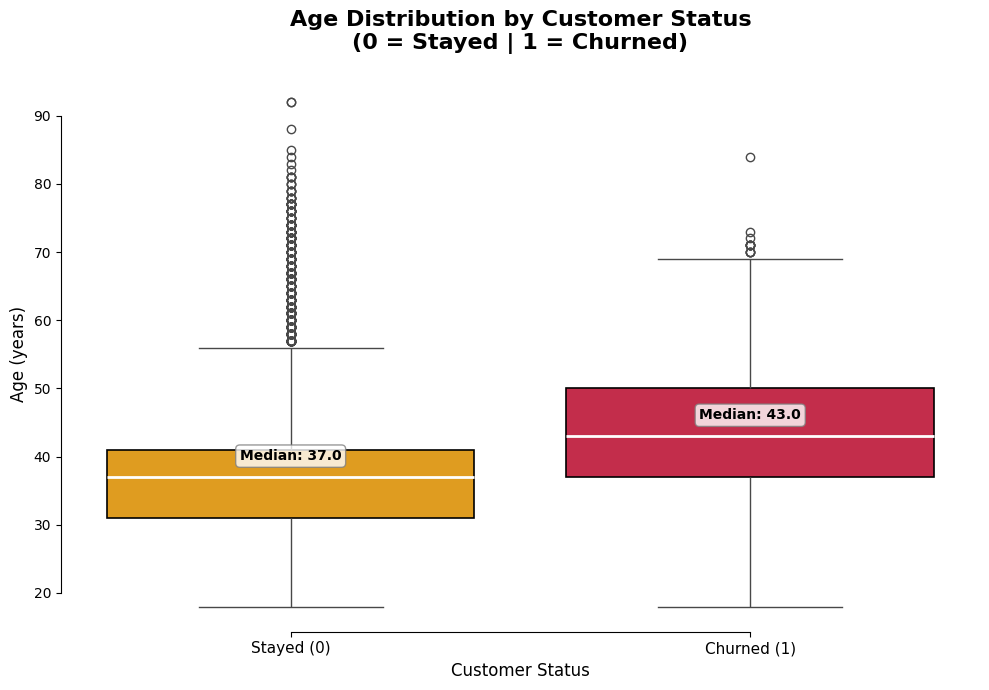

In [19]:
# Does age affect churn
plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=df, x='Exited', y='Age', palette=custom_palette,
                 boxprops=dict(edgecolor='black', linewidth=1.2),
                 medianprops=dict(color='white', linewidth=2))
plt.title('Age Distribution by Customer Status\n(0 = Stayed | 1 = Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Status', fontsize=12, fontweight='medium')
plt.ylabel('Age (years)', fontsize=12, fontweight='medium')
ax.set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)
sns.despine(trim=True)
plt.tight_layout()
medians = df.groupby('Exited')['Age'].median()
for i, median in enumerate(medians):
    ax.annotate(f'Median: {median:.1f}',
                xy=(i, median), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.show()

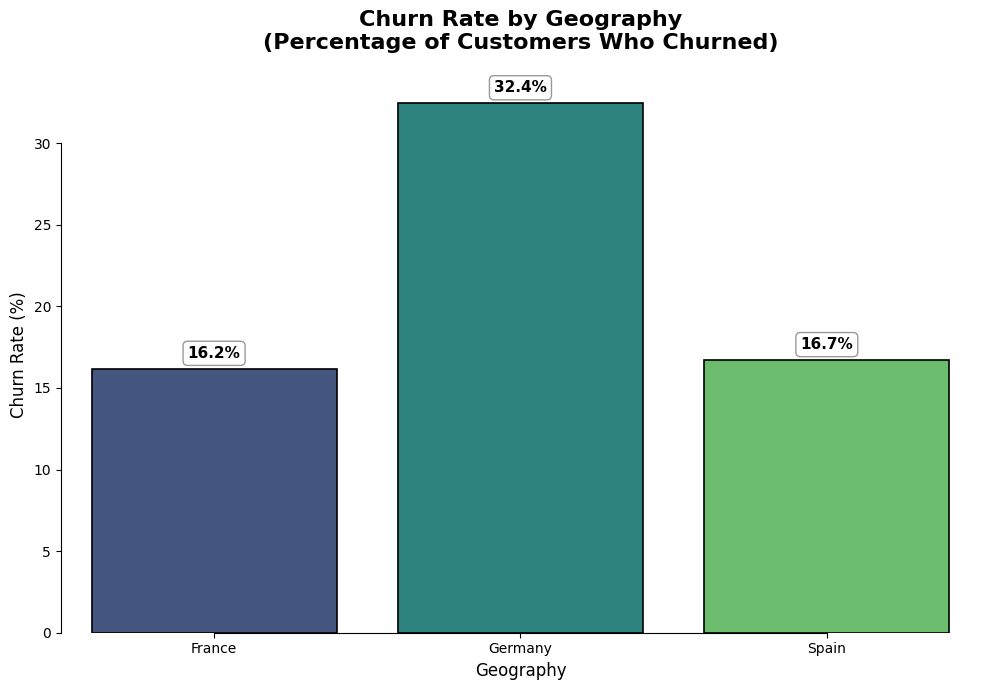

In [20]:
#Are certain geographies more likely to churn?
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index()
geo_churn['Exited'] *= 100

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=geo_churn, x='Geography', y='Exited', palette='viridis',
                 edgecolor='black', linewidth=1.2)
plt.title('Churn Rate by Geography\n(Percentage of Customers Who Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Geography', fontsize=12, fontweight='medium')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='medium')

sns.despine(trim=True)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', va='bottom', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()


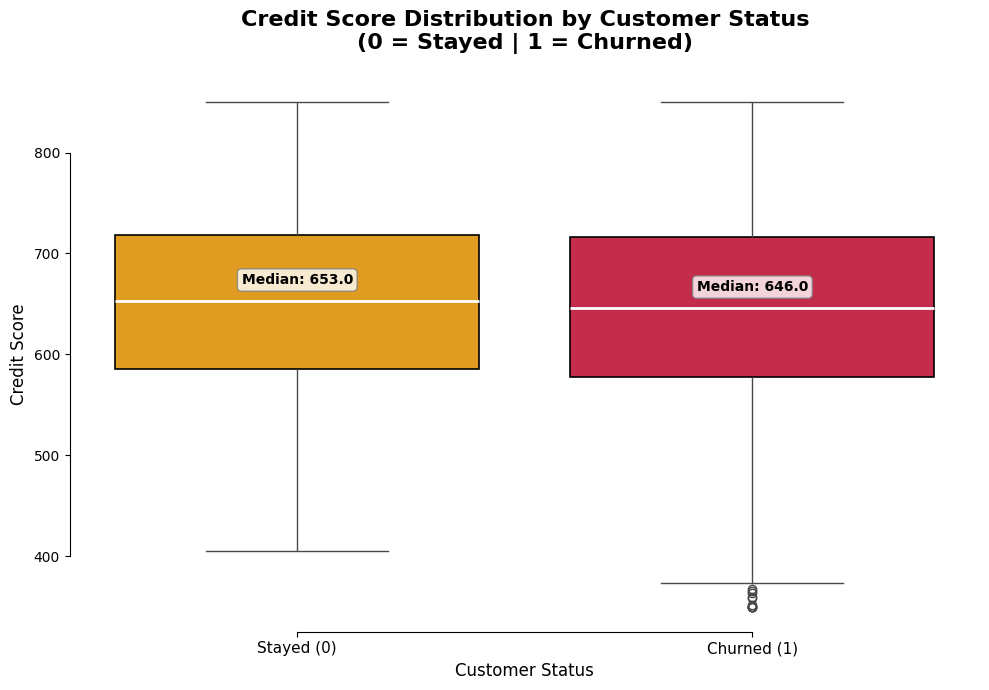

In [21]:
#Does credit score play a role
plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=df, x='Exited', y='CreditScore', palette=custom_palette,
                 boxprops=dict(edgecolor='black', linewidth=1.2),
                 medianprops=dict(color='white', linewidth=2))
plt.title('Credit Score Distribution by Customer Status\n(0 = Stayed | 1 = Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Status', fontsize=12, fontweight='medium')
plt.ylabel('Credit Score', fontsize=12, fontweight='medium')
ax.set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)
sns.despine(trim=True)
plt.tight_layout()
medians = df.groupby('Exited')['CreditScore'].median()
for i, median in enumerate(medians):
    ax.annotate(f'Median: {median:.1f}',
                xy=(i, median), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))
plt.show()

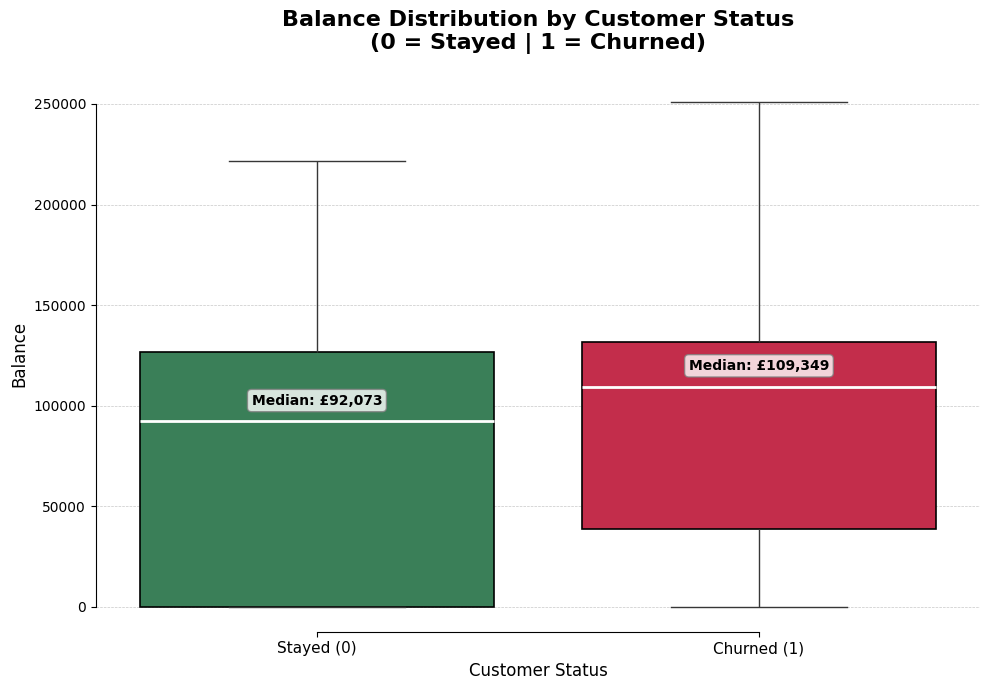

In [32]:
#Does balance play a role
plt.figure(figsize=(10, 7))
custom_palette = {'0': '#2E8B57', '1': '#DC143C'} # Changed keys to strings

ax = sns.boxplot(data=df, x='Exited', y='Balance', palette=custom_palette,
                 boxprops=dict(edgecolor='black', linewidth=1.2),
                 medianprops=dict(color='white', linewidth=2))
plt.title('Balance Distribution by Customer Status\n(0 = Stayed | 1 = Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Status', fontsize=12, fontweight='medium')
plt.ylabel('Balance', fontsize=12, fontweight='medium')

ax.set_xticklabels(['Stayed (0)', 'Churned (1)'], fontsize=11)

ax.yaxis.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)

sns.despine(trim=True)

plt.tight_layout()

medians = df.groupby('Exited')['Balance'].median()
for i, median in enumerate(medians):
    ax.annotate(f'Median: £{median:,.0f}',
                xy=(i, median), xytext=(0, 10),
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()

><font color=goldenrod>Visualize churn rates across different customer groups

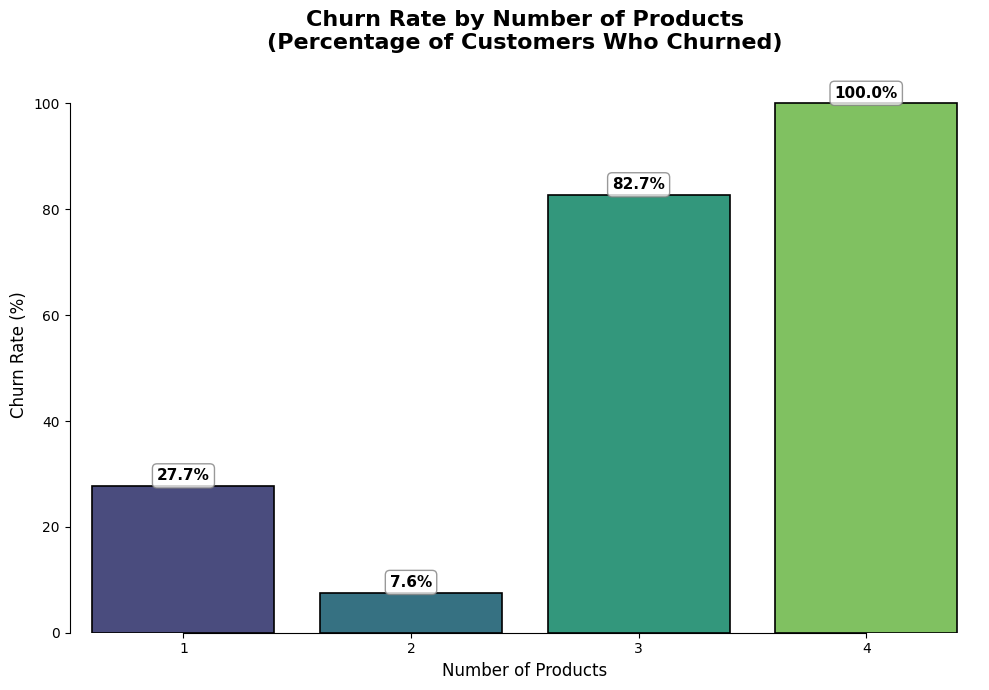

In [34]:
# Churn rates by groups (e.g., NumOfProducts)
prod_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
prod_churn['Exited'] *= 100

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=prod_churn, x='NumOfProducts', y='Exited', palette='viridis',
                 edgecolor='black', linewidth=1.2)
plt.title('Churn Rate by Number of Products\n(Percentage of Customers Who Churned)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Products', fontsize=12, fontweight='medium')
plt.ylabel('Churn Rate (%)', fontsize=12, fontweight='medium')

sns.despine(trim=True)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height + 0.5),
                ha='center', va='bottom', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))

plt.show()


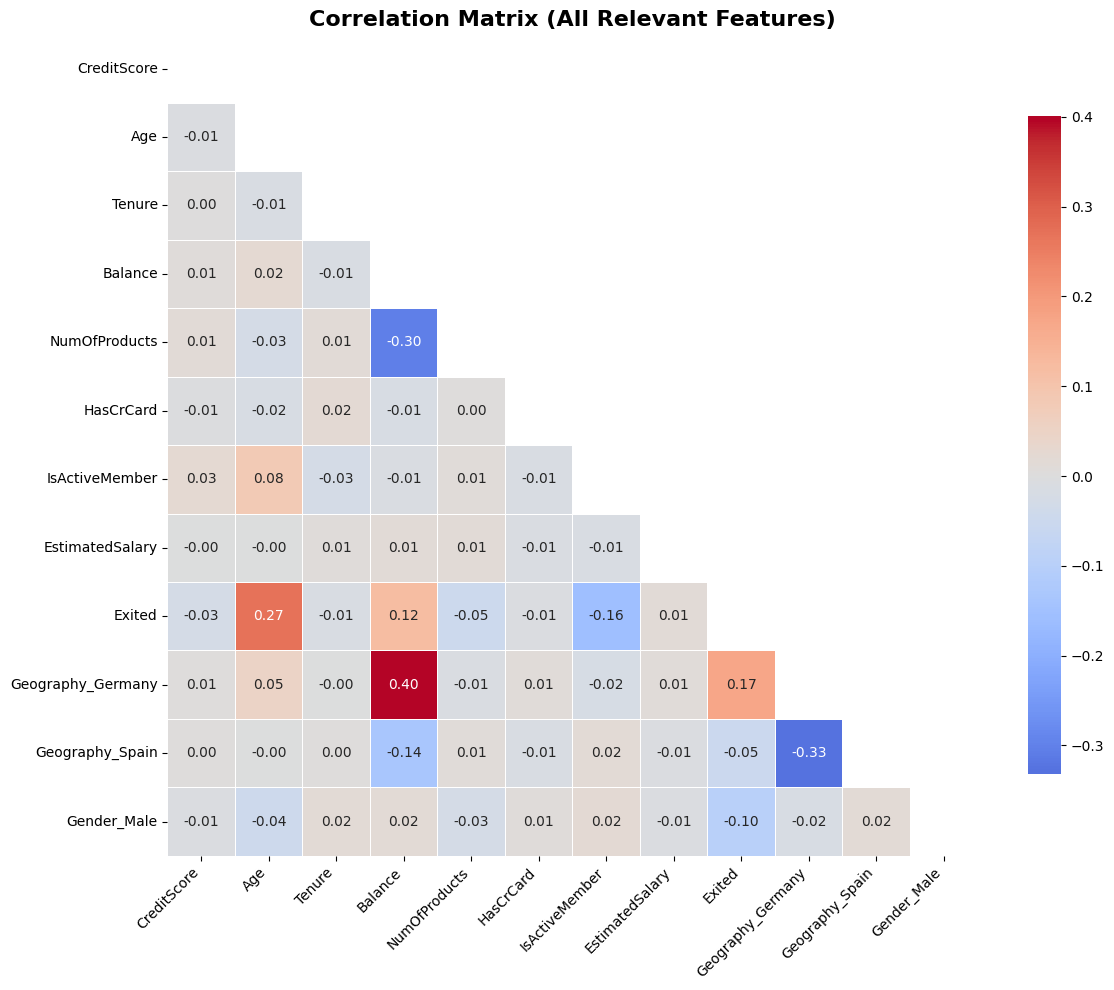

In [36]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Include all numerical and one-hot encoded features, plus cluster labels
correlation_matrix = df_encoded.corr(numeric_only=True)
mask = np.triu(correlation_matrix)

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix (All Relevant Features)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

><font color=plum size=4 >Unsupervised Learning: Dimensionality Reduction (PCA) and Clustering

Unsupervised Learning: Dimensionality Reduction (PCA) and Clustering
To uncover hidden patterns in unlabeled data (group customers by behavior).

<font color=grey> PCA: Reduce Complexity (Retain 95% Variance)


Original features: 11
PCA components: 9 explaining 95.5% variance


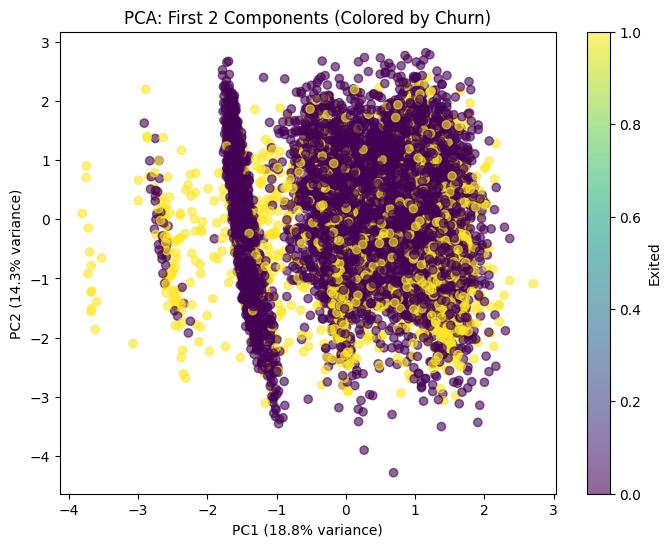

Top loadings (PC1):
 Tenure             0.660623
EstimatedSalary    0.387367
CreditScore        0.239899
Balance            0.107246
Gender_Male        0.022777
Name: PC1, dtype: float64


In [25]:
# Features for unsupervised (exclude target)
X_unsup = df_encoded.drop('Exited', axis=1)

# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_unsup)
print("Original features:", X_unsup.shape[1])
print("PCA components:", X_pca.shape[1], "explaining {:.1f}% variance".format(pca.explained_variance_ratio_.sum()*100))

# Visualize PCA (first 2 components, colored by Exited)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Exited'], cmap='viridis', alpha=0.6)
plt.title('PCA: First 2 Components (Colored by Churn)')
plt.xlabel('PC1 ({:.1f}% variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.1f}% variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.colorbar(scatter, label='Exited')
plt.show()

# Loadings (important features per PC)
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(pca.n_components_)], index=X_unsup.columns)
print("Top loadings (PC1):\n", loadings['PC1'].sort_values(ascending=False).head())

<font color=grey > K-Means Clustering (Group Unlabeled Data)

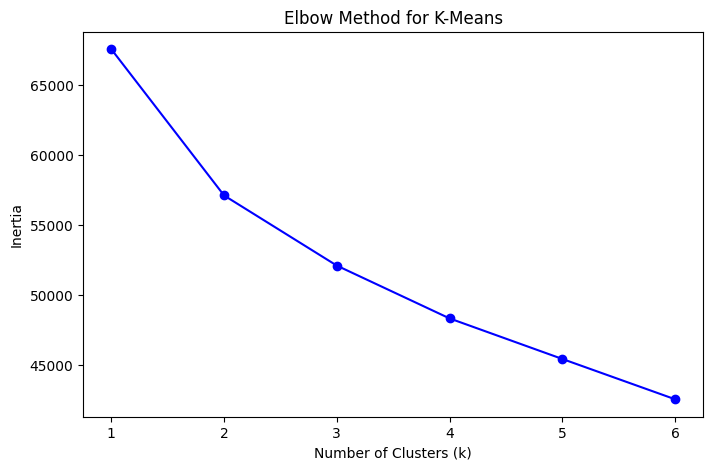

Exited              0      1
KMeans_Cluster              
0               0.863  0.137
1               0.745  0.255
2               0.783  0.217


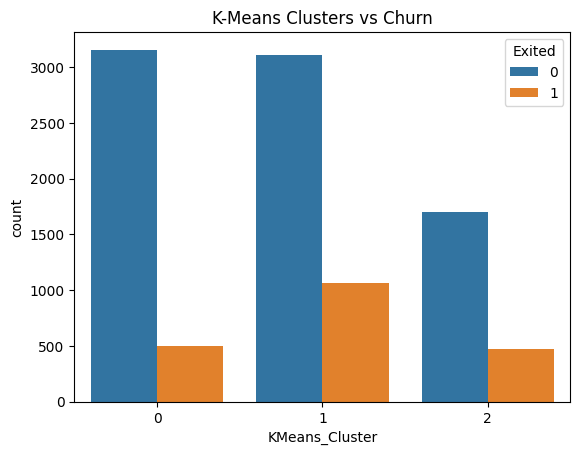

In [26]:
# Elbow method for K
inertias = []
K_range = range(1, 7)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means (k=3, optimal from elbow)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

# Analyze clusters vs churn
print(pd.crosstab(df['KMeans_Cluster'], df['Exited'], normalize='index').round(3))
sns.countplot(x='KMeans_Cluster', hue='Exited', data=df)
plt.title('K-Means Clusters vs Churn')
plt.show()

<font color=grey>  Hierarchical Clustering (Alternative Grouping)

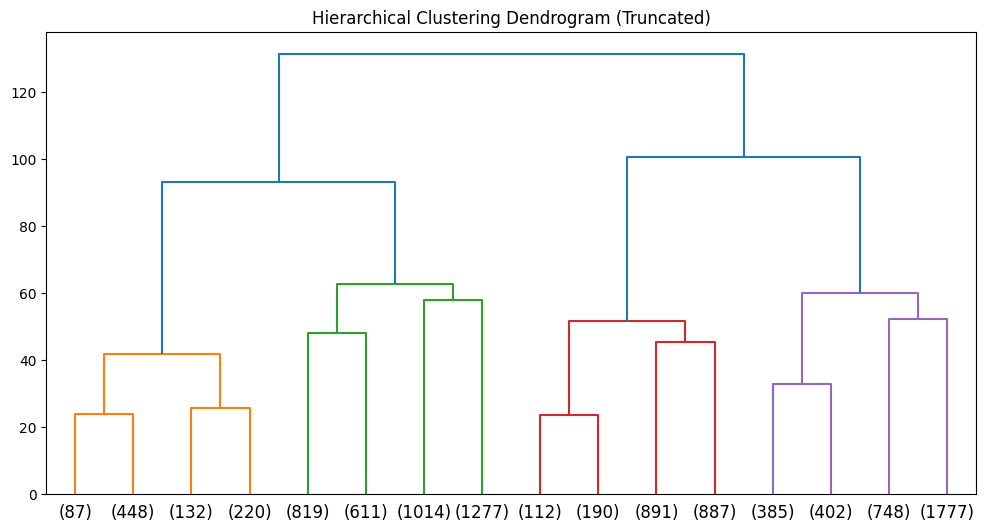

Exited        0      1
HCluster              
1         0.738  0.262
2         0.762  0.238
3         0.899  0.101


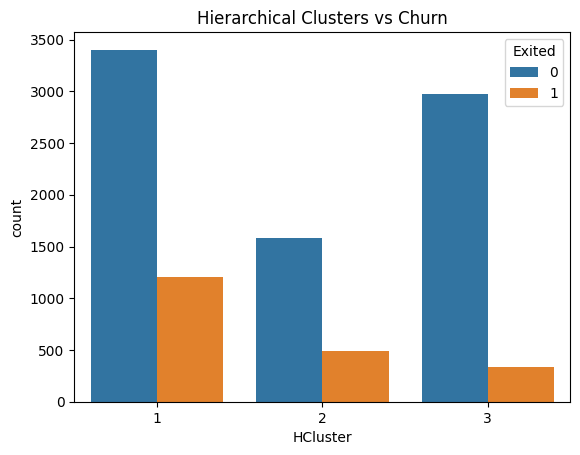

In [27]:
# Hierarchical
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.show()

# Cut to 3 clusters
h_clusters = fcluster(Z, 3, criterion='maxclust')
df['HCluster'] = h_clusters

# Analyze
print(pd.crosstab(df['HCluster'], df['Exited'], normalize='index').round(3))
sns.countplot(x='HCluster', hue='Exited', data=df)
plt.title('Hierarchical Clusters vs Churn')
plt.show()


<font size=4 color=cyan>3. Predictive Modeling


><font color=goldenrod>Split the dataset into training and test sets.

<font color=yellowgreen> Split Dataset (Stratified)

In [28]:
# Features/target (use encoded/scaled)
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Churn in train:", y_train.mean().round(3))

Train shape: (8000, 11) Test shape: (2000, 11)
Churn in train: 0.204


><font color=goldenrod> Train at least two machine learning models (e.g., Logistic Regression, Random Forest).

<font color=yellowgreen> Train Models
- Logistic Regression: Linear baseline.
- Random Forest: Ensemble for non-linearity.

In [29]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Feature importance (RF)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features (RF):\n", importances.head())

Top features (RF):
 Age                0.215798
EstimatedSalary    0.149491
CreditScore        0.148389
Balance            0.145515
NumOfProducts      0.136344
dtype: float64


><font color=goldenrod> Evaluate using accuracy, precision, recall, and F1-score

<font color=yellowgreen> Evaluate Models

In [30]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name}: Acc={acc:.3f}, Prec={prec:.3f}, Rec={rec:.3f}, F1={f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression: Acc=0.812, Prec=0.614, Rec=0.211, F1=0.314

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.61      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest: Acc=0.857, Prec=0.761, Rec=0.430, F1=0.549

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



<font size=4 color=cyan>4. **Insights & Recommendations**

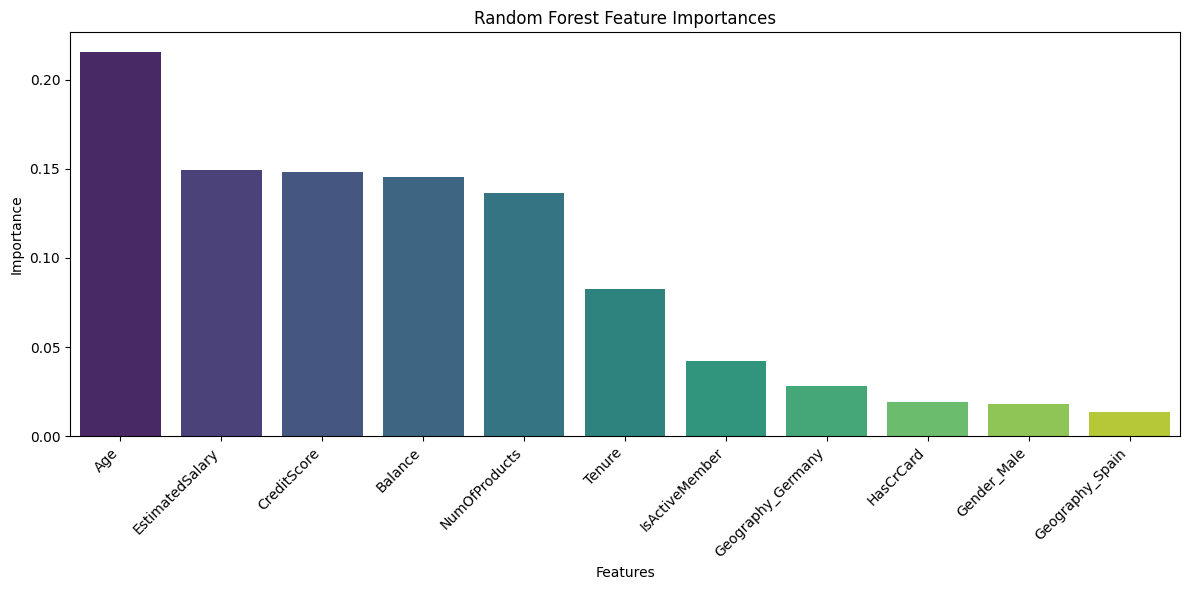

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances.index, y=importances.values, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Key Insights from the Analysis

Based on the data cleaning, preprocessing, exploratory data analysis, and predictive modeling, the following key insights regarding customer churn have been identified:

*   **Age is a significant factor:** Older customers appear to have a higher propensity to churn, as indicated by the feature importance and the boxplot showing a higher median age for churned customers.
*   **Geography matters:** Customers in Germany show a significantly higher churn rate compared to France and Spain. This suggests potential regional factors influencing churn.
*   **Financial behavior plays a role:** Features like Balance, Credit Score, and Estimated Salary are important predictors of churn, although the exact nature of their relationship might require further investigation (e.g., non-linear relationships).
*   **Number of Products is influential:** The number of products a customer holds is also an important factor in predicting churn.
*   **Inactive members are more likely to churn:** The 'IsActiveMember' feature has a notable importance, indicating that customers who are not actively using their accounts are at higher risk of leaving.
*   **Tenure has some impact:** While not as strong as other factors, tenure also contributes to the churn prediction.
*   **Basic demographics (Gender) and having a Credit Card are less influential:** Compared to other factors, Gender and HasCrCard have relatively lower importance in predicting churn according to the Random Forest model.
*   **Clustering reveals potential customer segments:** The K-Means and Hierarchical clustering analyses, while not directly used for prediction here, suggest that there are distinct groups of customers within the dataset, and these groups may have different churn behaviors. Cluster analysis could be further explored to tailor retention strategies to specific customer segments.

## Business Actions to Improve Retention

Based on the analysis, the following business actions can be suggested to improve customer retention:

*   **Targeted Offers for At-Risk Customers:**
    *   **Focus Areas:** Customers in Germany (highest churn rate), customers with higher age, higher balance, and potentially those with a lower number of products (as seen in some EDA).
    *   **Specific Actions:** Offer personalized incentives such as preferential interest rates on savings accounts, reduced fees on transactions, or exclusive access to new financial products. Use the predictive model to identify individuals most likely to churn and prioritize these offers.
*   **Loyalty Programs:**
    *   **Focus Areas:** Reward customers with longer tenure and those who utilize multiple products.
    *   **Specific Actions:** Implement tiered loyalty programs offering increasing benefits based on tenure and the number of products used. This could include annual bonuses, fee waivers, or dedicated customer support lines.
*   **Improve Customer Service in High-Churn Geographies:**
    *   **Focus Area:** Specifically target the German market.
    *   **Specific Actions:** Conduct in-depth market research in Germany to understand specific pain points. This could involve improving local branch services, offering culturally sensitive support, or tailoring product offerings to better suit the German market.
*   **Financial Counseling and Product Education:**
    *   **Focus Areas:** Customers with lower credit scores and those with high balances but potentially low engagement (as suggested by some EDA trends).
    *   **Specific Actions:** Offer free financial literacy workshops, personalized financial planning sessions, or educational materials on managing finances and utilizing bank products effectively. This can empower customers and build trust.
*   **Proactive Engagement with Inactive Members:**
    *   **Focus Areas:** Customers identified as inactive members by the 'IsActiveMember' feature.
    *   **Specific Actions:** Implement targeted outreach campaigns via email, phone, or in-app notifications. Understand the reasons for inactivity and offer tailored solutions, such as reminders about product benefits, special offers to re-engage, or simplified processes for reactivating accounts.